<p style="font-size:36px"> Demonstration of data.table functionality</p>

For several great example-based resources for seeing what data.table can do, see:

* DataCamp's data.table cheat sheet (saved under **H:\LIBRARY\R references/data.table/data.table cheat sheet.pdf**)
* the built-in function `example(data.table)` after loading the `data.table` library into R, and
* Andrew Brooks' great blog post on [Advanced Tips and Tricks with data.table](https://brooksandrew.github.io/simpleblog/articles/advanced-data-table/)

# Basics of data.table 
We'll start our demo with a simple data set that reflects as much richness as we'll need. Later, we'll generate much larger data sets to demonstrate the considerable speed advantages of data.table over data.frame methods.

Note that the data.frame "DF" and data.table "DT" have exactly parallel structure as displayed here. In R, their printed representations will differ slightly, where DT has a smarter printout, showing both head and tail rows, and field names printed at the bottom of the table for easier reference.

In [1]:
library(data.table)
set.seed(60637)
DF <- data.frame(id     = 1:12,
                 prog   = rep(c("A", "B", "None"), each = 4),
                 sch    = rep(c("North", "South"), times = 6),
                 gender = sample(c("M", "F"), 12, replace = TRUE),
                 score  = runif(12))
DT <- data.table(DF, key = "id,prog,sch,gender")
DF
DT

,id,prog,sch,gender,score
1,1,A,North,F,0.06739996
2,2,A,South,F,0.9206563
3,3,A,North,F,0.6910774
4,4,A,South,F,0.04123674
5,5,B,North,M,0.8092121
6,6,B,South,M,0.106991
7,7,B,North,M,0.4896426
8,8,B,South,M,0.05879476
9,9,None,North,F,0.2349503
10,10,None,South,M,0.362945


,id,prog,sch,gender,score
1,1,A,North,F,0.06739996
2,2,A,South,F,0.9206563
3,3,A,North,F,0.6910774
4,4,A,South,F,0.04123674
5,5,B,North,M,0.8092121
6,6,B,South,M,0.106991
7,7,B,North,M,0.4896426
8,8,B,South,M,0.05879476
9,9,None,North,F,0.2349503
10,10,None,South,M,0.362945


## General structure of working with data.table objects
Whereas data.frame contents can be accessed using square brackets and references to rows and columns, i.e. `df[*row indication*, *col indication*]`, data.table contents take three arguments: `dt[i,j,by]` where:

* `i` - indication of rows
* `j` - indication/operation on columns (optional)
* `by` - built-in ability to run operations with a subset

## Subsetting by rows
This works both by the familiar dt[<row subset info>.] with a comma demarcating rows vs. colums, or simply with dt[<row subset info>] with no comma.

In [2]:
DT[3:5,]

,id,prog,sch,gender,score
1,3,A,North,F,0.6910774
2,4,A,South,F,0.04123674
3,5,B,North,M,0.8092121


In [3]:
DT[3:5]

,id,prog,sch,gender,score
1,3,A,North,F,0.6910774
2,4,A,South,F,0.04123674
3,5,B,North,M,0.8092121


In [4]:
DT[sch == "North"]

,id,prog,sch,gender,score
1,1,A,North,F,0.06739996
2,3,A,North,F,0.6910774
3,5,B,North,M,0.8092121
4,7,B,North,M,0.4896426
5,9,None,North,F,0.2349503
6,11,None,North,F,0.8463468


In [5]:
DT[prog %in% c("A", "B")]

,id,prog,sch,gender,score
1,1,A,North,F,0.06739996
2,2,A,South,F,0.9206563
3,3,A,North,F,0.6910774
4,4,A,South,F,0.04123674
5,5,B,North,M,0.8092121
6,6,B,South,M,0.106991
7,7,B,North,M,0.4896426
8,8,B,South,M,0.05879476


## Working with data.table columns

In [6]:
# Referencing columns in data.table is also just a bit different than for data.frames.
# Rather than refering to column titles using their names, stored as a string, you
# refer to them using the unquoted name of the column. Think about this as similar to
# e.g. subset(), aggregate(), or within() functions, where you indicate the name
# of the data.frame and then are within the "environment" of that data.frame and
# can reference names of the columns directly, as if there were objects in the global
# environment.
DT[, "sch"]
DT[, sch]

[1] "sch"

[1] North South North South North South North South North South North South
Levels: North South

In [7]:
# However you can still reference columns by string by using the get() function, whose (helpful!) job it
# it is to take the name of an object, stored as a string, and fetch you the object itself.
DT[, get("sch")]

[1] North South North South North South North South North South North South
Levels: North South

In [8]:
# Additionally, think of groups of columns as lists
DT[1:3, list(id, sch)]
# And note that ".()" is shorthand for "list()"
DT[1:3, .(id, sch)]

,id,sch
1,1,North
2,2,South
3,3,North


,id,sch
1,1,North
2,2,South
3,3,North


In [9]:
# (Indeed, it may be interesting to know that data.frames are constructed as a special
#  type of list, where each list element is of exactly the same length. The fact that 
#  lists can have contents of totally different types is what lets columns of data.frames
#  have columns of different data types, unlike matrices which are also 2x2 tables but which
#  can only have elements of the same (numeric) types.)
# For example, the following command loops through DF's columns since, as a data.frame/list, its
# base elements are the columns. 
lapply(DF, function(x) class(x))

$id
[1] "integer"

$prog
[1] "factor"

$sch
[1] "factor"

$gender
[1] "factor"

$score
[1] "numeric"

In [10]:
DT[, mean(score)]

[1] 0.4596354

In [11]:
DT[, .(mean(score), sum(score))]

,V1,V2
1,0.4596354,5.515625


In [12]:
DT[, .(mean_score = mean(score), sum_score = sum(score))]

,mean_score,sum_score
1,0.4596354,5.515625


(Need to talk about ```:=``` as its own operation that generates an assignment within the data table)

In [13]:
DT[1:3, .(id, score, mean_score = mean(score))]

,id,score,mean_score
1,1,0.06739996,0.5597112
2,2,0.9206563,0.5597112
3,3,0.6910774,0.5597112


 [1] 0.06739996 0.92065630 0.69107737 0.04123674 0.80921214 0.10699104
 [7] 0.48964260 0.05879476 0.23495028 0.36294500 0.84634683 0.88637177


NULL

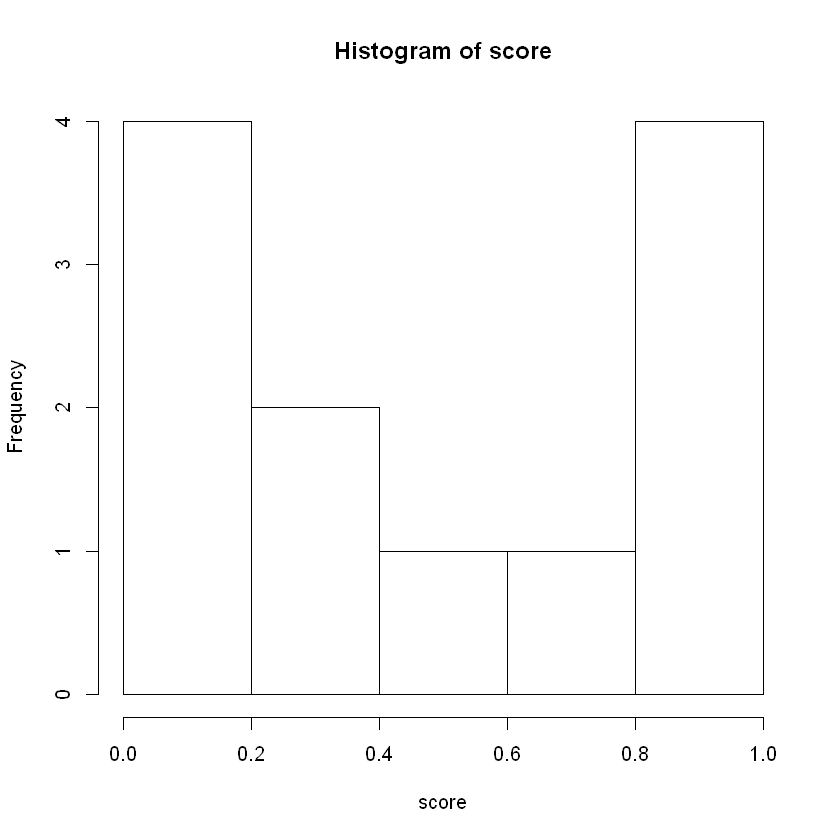

In [14]:
# Can even run multiple commands from within the DT environment using curly braces
DT[, {print(score)
      hist(score)$histogram
      }]

# Working with "by"s

In [15]:
# Can specify the "by" using a character string...
DT[, .(mean_score = mean(score)), by = "prog"]

,prog,mean_score
1,A,0.4300926
2,B,0.3661601
3,None,0.5826535


In [16]:
# ... or as a column object within the data.table object 
DT[, .(mean_score = mean(score)), by = prog]

,prog,mean_score
1,A,0.4300926
2,B,0.3661601
3,None,0.5826535


In [17]:
# Can do multiple "by"s with a string, separating by commas
DT[, .(mean_score = mean(score)), by = "prog,sch"]

,prog,sch,mean_score
1,A,North,0.3792387
2,A,South,0.4809465
3,B,North,0.6494274
4,B,South,0.0828929
5,None,North,0.5406486
6,None,South,0.6246584


In [18]:
# Can do multiple "by"s with column object references, using list syntax (i.e. the ".()")
DT[, .(mean_score = mean(score)), by = .(prog,sch)]

,prog,sch,mean_score
1,A,North,0.3792387
2,A,South,0.4809465
3,B,North,0.6494274
4,B,South,0.0828929
5,None,North,0.5406486
6,None,South,0.6246584


In [19]:
# Just like with columns, we can generate "by" information on the fly
DT[, .(mean_score = mean(score)), by = .(any_prog = prog %in% c("A", "B"))]

,any_prog,mean_score
1,TRUE,0.3981264
2,FALSE,0.5826535


In [20]:
# Subset and then perform "by" calculations
DT[sch == "North", .(mean_score = mean(score), N = .N), by = "gender"]

,gender,mean_score,N
1,F,0.4599436,4
2,M,0.6494274,2


# Working with special values
E.g. ".N", ".I", ".GRP", ".SD" and others

In [21]:
# Using .N for group counts
DT[, .(count = .N, group = .GRP), by = "gender"]

,gender,count,group
1,F,6,1
2,M,6,2


## Using .SD to perform operations across many columns
`.SD` is shorthand for all of the columns besides those used in the "by". Subsets of those columns can be determined by adding a argument of `.SDcols` within the data.table statement.

In [22]:
n <- 100
scores <- data.frame(cat = sample(LETTERS[1:3], n, replace = TRUE), score1 = runif(n), score2 = rnorm(n), score3 = rlogis(n))
dtScores <- data.table(scores)
dtScores[,lapply(.SD, mean), by = "cat"]
dtScores[,lapply(.SD, mean), by = "cat", .SDcols = c("score2","score3")]

,cat,score1,score2,score3
1,A,0.4649029,-0.02409428,0.4661274
2,C,0.4925664,0.04642162,0.453456
3,B,0.5717518,0.07706304,-0.005196022


,cat,score2,score3
1,A,-0.02409428,0.4661274
2,C,0.04642162,0.453456
3,B,0.07706304,-0.005196022


# Using the `:=` operator for assignments

In [23]:
# Using ":=" generates an assignment within the data table. Rather than being an on-the-fly calculation, it directly 
# modifies the underlying data
DT[, mean_score := mean(score)]
# Note that, in this case, it would be redundant to assign the output to a new object,
# e.g. don't do: newDT <- DT[, mean_score := mean(score)]

,id,prog,sch,gender,score,mean_score
1,1,A,North,F,0.06739996,0.4596354
2,2,A,South,F,0.9206563,0.4596354
3,3,A,North,F,0.6910774,0.4596354
4,4,A,South,F,0.04123674,0.4596354
5,5,B,North,M,0.8092121,0.4596354
6,6,B,South,M,0.106991,0.4596354
7,7,B,North,M,0.4896426,0.4596354
8,8,B,South,M,0.05879476,0.4596354
9,9,None,North,F,0.2349503,0.4596354
10,10,None,South,M,0.362945,0.4596354


In [24]:
# The ":=" operator can be used to create multiple new columns.
# Interestingly enough, the left-hand side is (as far as I can tell)
# specified as a string
DT[, c("A", "B") := list(runif(nrow(DT)), letters[1:nrow(DT)])]

,id,prog,sch,gender,score,mean_score,A,B
1,1,A,North,F,0.06739996,0.4596354,0.7790998,a
2,2,A,South,F,0.9206563,0.4596354,0.5007577,b
3,3,A,North,F,0.6910774,0.4596354,0.5725961,c
4,4,A,South,F,0.04123674,0.4596354,0.1458192,d
5,5,B,North,M,0.8092121,0.4596354,0.8328311,e
6,6,B,South,M,0.106991,0.4596354,0.1355983,f
7,7,B,North,M,0.4896426,0.4596354,0.4246577,g
8,8,B,South,M,0.05879476,0.4596354,0.4855925,h
9,9,None,North,F,0.2349503,0.4596354,0.5816945,i
10,10,None,South,M,0.362945,0.4596354,0.4928414,j


In [25]:
# Columns can be removed by using ":=" to assign columns to null
DT[, "mean_score" := NULL]
DT[, c("A", "B") := NULL]

,id,prog,sch,gender,score,A,B
1,1,A,North,F,0.06739996,0.7790998,a
2,2,A,South,F,0.9206563,0.5007577,b
3,3,A,North,F,0.6910774,0.5725961,c
4,4,A,South,F,0.04123674,0.1458192,d
5,5,B,North,M,0.8092121,0.8328311,e
6,6,B,South,M,0.106991,0.1355983,f
7,7,B,North,M,0.4896426,0.4246577,g
8,8,B,South,M,0.05879476,0.4855925,h
9,9,None,North,F,0.2349503,0.5816945,i
10,10,None,South,M,0.362945,0.4928414,j


,id,prog,sch,gender,score
1,1,A,North,F,0.06739996
2,2,A,South,F,0.9206563
3,3,A,North,F,0.6910774
4,4,A,South,F,0.04123674
5,5,B,North,M,0.8092121
6,6,B,South,M,0.106991
7,7,B,North,M,0.4896426
8,8,B,South,M,0.05879476
9,9,None,North,F,0.2349503
10,10,None,South,M,0.362945


# Chaining
Chaining is a straightforward way to perform multiple sequential operations on a given object. It is not unique to data.table objects, but can be very handy.

In [26]:
# A fully spelled-out sequential process
temp <- DT[, score_mean = mean(score), by = prog]
temp[score_sum>0.3]

# Done by chaining
DT[, score_mean = mean(score), by = prog][score_sum>0.3]

ERROR: Error in `[.data.table`(DT, , score_mean = mean(score), by = prog): unused argument (score_mean = mean(score))


ERROR: Error in eval(expr, envir, enclos): object 'temp' not found


ERROR: Error in `[.data.table`(DT, , score_mean = mean(score), by = prog): unused argument (score_mean = mean(score))


Another way way to chain operations within a data.table statement is using curly braces, where only the last statement is returned

# Using data.table for data manipulations

In [27]:
# Operations that you commonly perform on data.frames will work with data.table objects too
DT$plusfive <- DT$score + 5
DT <- within(DT, {
    someProg <- ifelse(prog == "None", "Nope", "Yep")    
    fSomeProg <- factor(someProg)
})
subset(DT, id >= 6)
str(DT)

,id,prog,sch,gender,score,plusfive,fSomeProg,someProg
1,6,B,South,M,0.106991,5.106991,Yep,Yep
2,7,B,North,M,0.4896426,5.489643,Yep,Yep
3,8,B,South,M,0.05879476,5.058795,Yep,Yep
4,9,None,North,F,0.2349503,5.23495,Nope,Nope
5,10,None,South,M,0.362945,5.362945,Nope,Nope
6,11,None,North,F,0.8463468,5.846347,Nope,Nope
7,12,None,South,M,0.8863718,5.886372,Nope,Nope


Classes 'data.table' and 'data.frame':	12 obs. of  8 variables:
 $ id       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ prog     : Factor w/ 3 levels "A","B","None": 1 1 1 1 2 2 2 2 3 3 ...
 $ sch      : Factor w/ 2 levels "North","South": 1 2 1 2 1 2 1 2 1 2 ...
 $ gender   : Factor w/ 2 levels "F","M": 1 1 1 1 2 2 2 2 1 2 ...
 $ score    : num  0.0674 0.9207 0.6911 0.0412 0.8092 ...
 $ plusfive : num  5.07 5.92 5.69 5.04 5.81 ...
 $ fSomeProg: Factor w/ 2 levels "Nope","Yep": 2 2 2 2 2 2 2 2 1 1 ...
 $ someProg : chr  "Yep" "Yep" "Yep" "Yep" ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "index")= atomic  
  ..- attr(*, "sch")= int  1 3 5 7 9 11 2 4 6 8 ...
  ..- attr(*, "prog")= int 
 - attr(*, "sorted")= chr  "id" "prog" "sch" "gender"


In [28]:
# Some things that don't work
DT <- within(DT, {
    male <- FALSE
    male[gender == "M"] <- TRUE
})
cbind(DT, DT$gender == "M")

# And alternatives:
DT$male <- FALSE
DT[gender == "M", male := TRUE] # NSM: Not understanding/thrilled by auto print when data.table does these manipulations
DT[, .(gender, male)]

,id,prog,sch,gender,score,plusfive,fSomeProg,someProg,male,V2
1,1,A,North,F,0.06739996,5.0674,Yep,Yep,FALSE,FALSE
2,2,A,South,F,0.9206563,5.920656,Yep,Yep,NA,FALSE
3,3,A,North,F,0.6910774,5.691077,Yep,Yep,NA,FALSE
4,4,A,South,F,0.04123674,5.041237,Yep,Yep,NA,FALSE
5,5,B,North,M,0.8092121,5.809212,Yep,Yep,TRUE,TRUE
6,6,B,South,M,0.106991,5.106991,Yep,Yep,TRUE,TRUE
7,7,B,North,M,0.4896426,5.489643,Yep,Yep,TRUE,TRUE
8,8,B,South,M,0.05879476,5.058795,Yep,Yep,TRUE,TRUE
9,9,None,North,F,0.2349503,5.23495,Nope,Nope,NA,FALSE
10,10,None,South,M,0.362945,5.362945,Nope,Nope,TRUE,TRUE


,id,prog,sch,gender,score,plusfive,fSomeProg,someProg,male
1,1,A,North,F,0.06739996,5.0674,Yep,Yep,FALSE
2,2,A,South,F,0.9206563,5.920656,Yep,Yep,FALSE
3,3,A,North,F,0.6910774,5.691077,Yep,Yep,FALSE
4,4,A,South,F,0.04123674,5.041237,Yep,Yep,FALSE
5,5,B,North,M,0.8092121,5.809212,Yep,Yep,TRUE
6,6,B,South,M,0.106991,5.106991,Yep,Yep,TRUE
7,7,B,North,M,0.4896426,5.489643,Yep,Yep,TRUE
8,8,B,South,M,0.05879476,5.058795,Yep,Yep,TRUE
9,9,None,North,F,0.2349503,5.23495,Nope,Nope,FALSE
10,10,None,South,M,0.362945,5.362945,Nope,Nope,TRUE


,gender,male
1,F,FALSE
2,F,FALSE
3,F,FALSE
4,F,FALSE
5,M,TRUE
6,M,TRUE
7,M,TRUE
8,M,TRUE
9,F,FALSE
10,M,TRUE


# Saving time with data.table

## Assigning values

In [29]:
# An example from Andrew Brooks' advanced data.table article
M = matrix(1,nrow=100000,ncol=100)
DF = as.data.frame(M)
DT = as.data.table(M)
system.time(for (i in 1:1000) DF[i,1L] <- i)
system.time(for (i in 1:1000) DT[i,V1:=i])
system.time(for (i in 1:1000) M[i,1L] <- i)
system.time(for (i in 1:1000) set(DT,i,1L,i))

   user  system elapsed 
   0.34    0.44    0.79 

   user  system elapsed 
   0.64    0.00    0.66 

   user  system elapsed 
   0.06    0.06    0.20 

   user  system elapsed 
   0.01    0.00    0.01 

## Calculations with "By"s

In [30]:
n <- 1e6
dfBig <- data.frame(cat = sample(LETTERS[1:4], n, replace = TRUE), x = rnorm(n))
dtBig <- data.table(dfBig)
dtBigKey <- data.table(dfBig, key = "cat")

In [31]:
library(plyr)
system.time(mean_agg <- aggregate(x ~ cat, data = dfBig, mean))
system.time(mean_ply <- ddply(dfBig, .(cat), summarize, x_mean = mean(x)))
system.time(mean_dt  <- dtBig[, mean(x), by = "cat"])
system.time(mean_key <- dtBigKey[, mean(x), by = "cat"])

   user  system elapsed 
  41.84    0.38   44.23 

   user  system elapsed 
   0.32    0.06    0.37 

   user  system elapsed 
   0.07    0.00    0.07 

   user  system elapsed 
   0.06    0.00    0.07 

In [32]:
library(magrittr) # This is a great library that allows coders to "pipe" the results of
                  # one function into the first argument of another
merge(mean_agg, mean_ply, by = "cat") %>% merge(mean_dt, by = "cat") %>% merge(mean_key, by = "cat")

,cat,x,x_mean,V1.x,V1.y
1,A,-0.002813597,-0.002813597,-0.002813597,-0.002813597
2,B,0.005081824,0.005081824,0.005081824,0.005081824
3,C,0.002282273,0.002282273,0.002282273,0.002282273
4,D,0.00209818,0.00209818,0.00209818,0.00209818
